In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [413]:
df=pd.read_csv("training_set.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [414]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [415]:
df.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
dtype: int64

In [416]:
colors=['blue','orange','green','red']

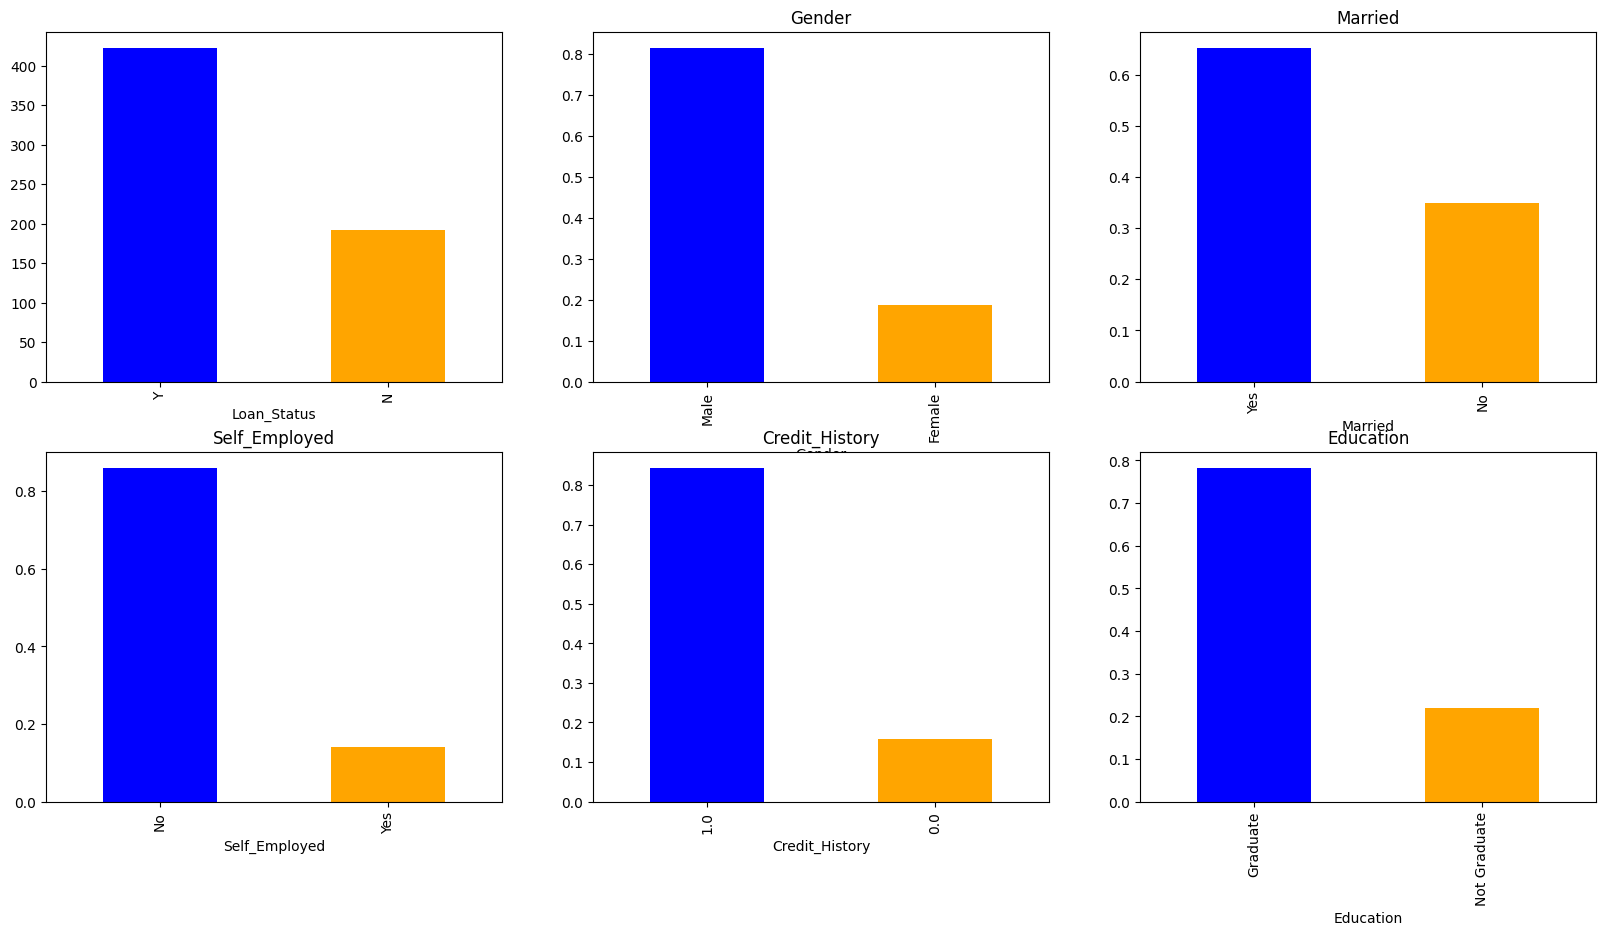

In [417]:
plt.subplot(231)
df['Loan_Status'].value_counts().plot.bar(color=colors)

plt.subplot(232)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender',color=colors)

plt.subplot(233)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married',color=colors)

plt.subplot(234)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed',color=colors)

plt.subplot(235)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History',color=colors)

plt.subplot(236)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education',color=colors)

plt.show()

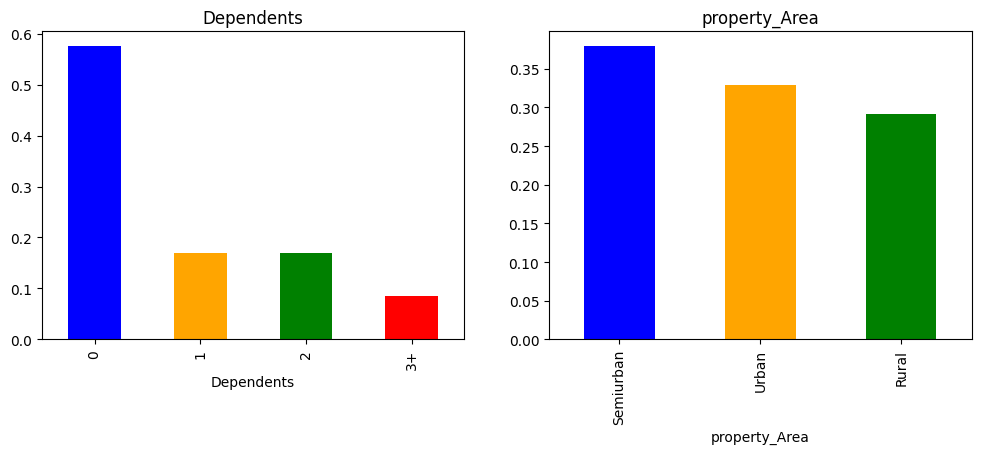

In [418]:
plt.subplot(121)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents',color=colors)

plt.subplot(122)
df['property_Area'].value_counts(normalize=True).plot.bar(title= 'property_Area',color=colors)

plt.show()

C:\Users\Richa\AppData\Local\Temp\ipykernel_30880\3385199946.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


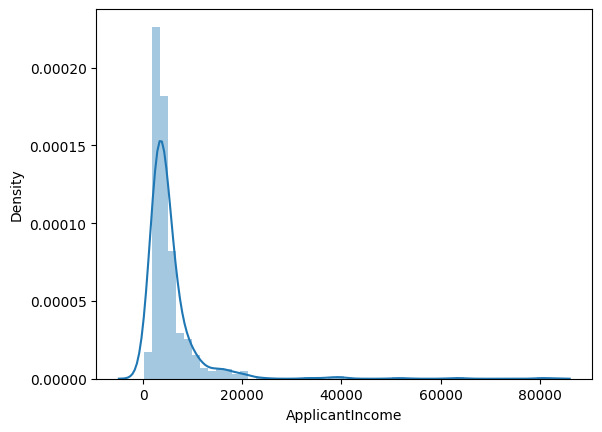

In [419]:
sns.distplot(df['ApplicantIncome'])
plt.show()

C:\Users\Richa\AppData\Local\Temp\ipykernel_30880\1457747018.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


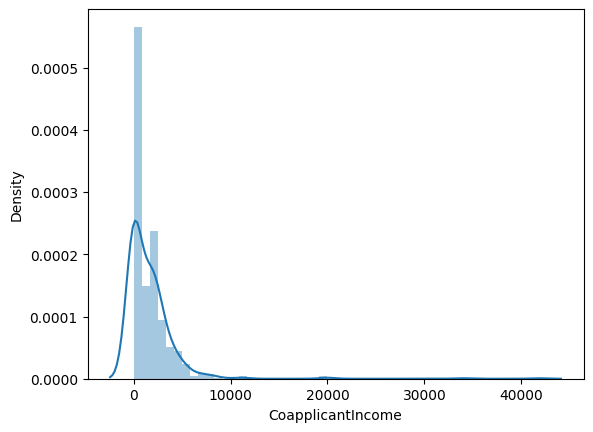

In [420]:
sns.distplot(df['CoapplicantIncome'])
plt.show()

C:\Users\Richa\AppData\Local\Temp\ipykernel_30880\3669599957.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


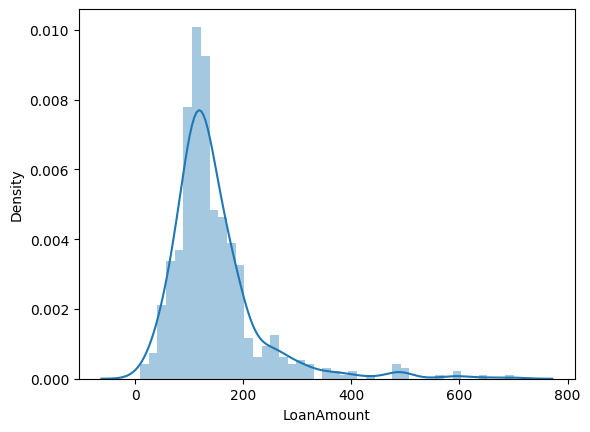

In [421]:
sns.distplot(df['LoanAmount'])
plt.show()

<Axes: title={'center': 'Loan_Amount_Term'}, xlabel='Loan_Amount_Term'>

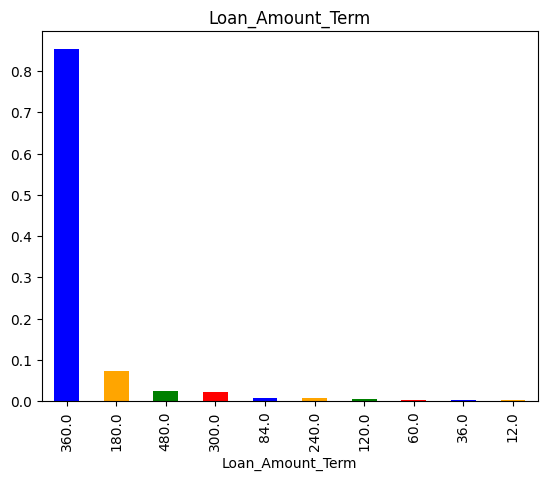

In [422]:
df['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term',color=colors)

In [423]:
df['Loan_ID'] = df['Loan_ID'].str.replace("LP", "", regex=True).astype(int)

In [424]:
# Create one-hot encoded columns for property_Area while keeping the original column
df_encoded = pd.get_dummies(df['property_Area'], prefix='property_Area')
df = pd.concat([df, df_encoded], axis=1)
df.rename(columns={'property_Area_Urban': 'Urban', 'property_Area_Rural': 'Rural', 'property_Area_Semiurban': 'Semiurban'}, inplace=True)

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status,Rural,Semiurban,Urban
0,1002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y,False,False,True
1,1003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N,True,False,False
2,1005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,False,False,True
3,1006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,False,False,True
4,1008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,False,False,True


In [425]:
df_encoded_gender = pd.get_dummies(df['Gender'], prefix='Gender')
df = pd.concat([df, df_encoded_gender], axis=1)
df.rename(columns={'Gender_Male': 'Male', 'Gender_Female': 'Female'}, inplace=True)

In [426]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                       'property_Area', 'Loan_Status','Rural','Urban','Semiurban','Female','Male']

# Convert categorical values to numeric using label encoding
for col in categorical_columns:
    df[col] = df[col].astype('category').cat.codes  # Converts categories to numbers
df.replace(-1, np.nan, inplace=True)

In [427]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status,Rural,Semiurban,Urban,Female,Male
0,1002,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,NaN,360.0,1.0,2,1,0,0,1,0,1
1,1003,1.0,1.0,1.0,0.0,0.0,NaN,1508.0,128.0,360.0,1.0,0,0,1,0,0,0,1
2,1005,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2,1,0,0,1,0,1
3,1006,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2,1,0,0,1,0,1
4,1008,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2978,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.0,360.0,1.0,0,1,1,0,0,1,0
610,2979,1.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.0,180.0,1.0,0,1,1,0,0,0,1
611,2983,1.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.0,360.0,1.0,2,1,0,0,1,0,1
612,2984,1.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.0,360.0,1.0,2,1,0,0,1,0,1


In [428]:
df.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
Rural                 0
Semiurban             0
Urban                 0
Female                0
Male                  0
dtype: int64

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status,Rural,Semiurban,Urban,Female,Male
Loan_ID,1.000000,-0.028810,-0.014705,0.054679,0.036151,0.033295,0.018831,0.039822,0.038447,-0.030481,-0.032910,-0.158826,0.011958,0.138927,-0.002689,-0.131603,0.027152,-0.031275
Gender,-0.028810,1.000000,0.368910,0.174472,0.050603,-0.011987,0.054560,0.083275,0.106339,-0.075606,0.015609,-0.026579,0.018804,0.082116,-0.110820,0.034950,-1.000000,1.000000
Married,-0.014705,0.368910,1.000000,0.343417,0.014869,0.001909,0.051429,0.077718,0.149519,-0.103810,0.004381,0.002918,0.089280,-0.004520,0.003744,0.000514,-0.367926,0.331708
Dependents,0.054679,0.174472,0.343417,1.000000,0.060324,0.057867,0.118701,0.027151,0.163997,-0.100484,-0.050082,0.006828,0.006781,-0.007359,0.002758,0.004310,-0.175578,0.140565
Education,0.036151,0.050603,0.014869,0.060324,1.000000,-0.012708,-0.141244,-0.062282,-0.170958,-0.078567,-0.081454,-0.064282,-0.085354,0.077010,-0.040114,-0.033111,-0.045790,0.065854
Self_Employed,0.033295,-0.011987,0.001909,0.057867,-0.012708,1.000000,0.140721,-0.011152,0.123931,-0.037069,0.003883,-0.031214,-0.002303,0.023815,0.005900,-0.029171,0.004474,-0.041452
ApplicantIncome,0.018831,0.054560,0.051429,0.118701,-0.141244,0.140721,1.000000,-0.116677,0.570893,-0.045213,-0.014548,-0.009666,-0.004964,0.016131,-0.014527,-0.000579,-0.058993,0.015937
CoapplicantIncome,0.039822,0.083275,0.077718,0.027151,-0.062282,-0.011152,-0.116677,1.000000,0.188700,-0.059917,-0.002153,0.010385,-0.059292,0.005409,-0.026962,0.022639,-0.082870,0.078476
LoanAmount,0.038447,0.106339,0.149519,0.163997,-0.170958,0.123931,0.570893,0.188700,1.000000,0.039447,-0.008433,-0.045792,-0.037318,0.043942,-0.008401,-0.034003,-0.109520,0.061072
Loan_Amount_Term,-0.030481,-0.075606,-0.103810,-0.100484,-0.078567,-0.037069,-0.045213,-0.059917,0.039447,1.000000,0.001470,-0.078748,-0.021268,0.034827,0.061957,-0.098112,0.074539,-0.072876


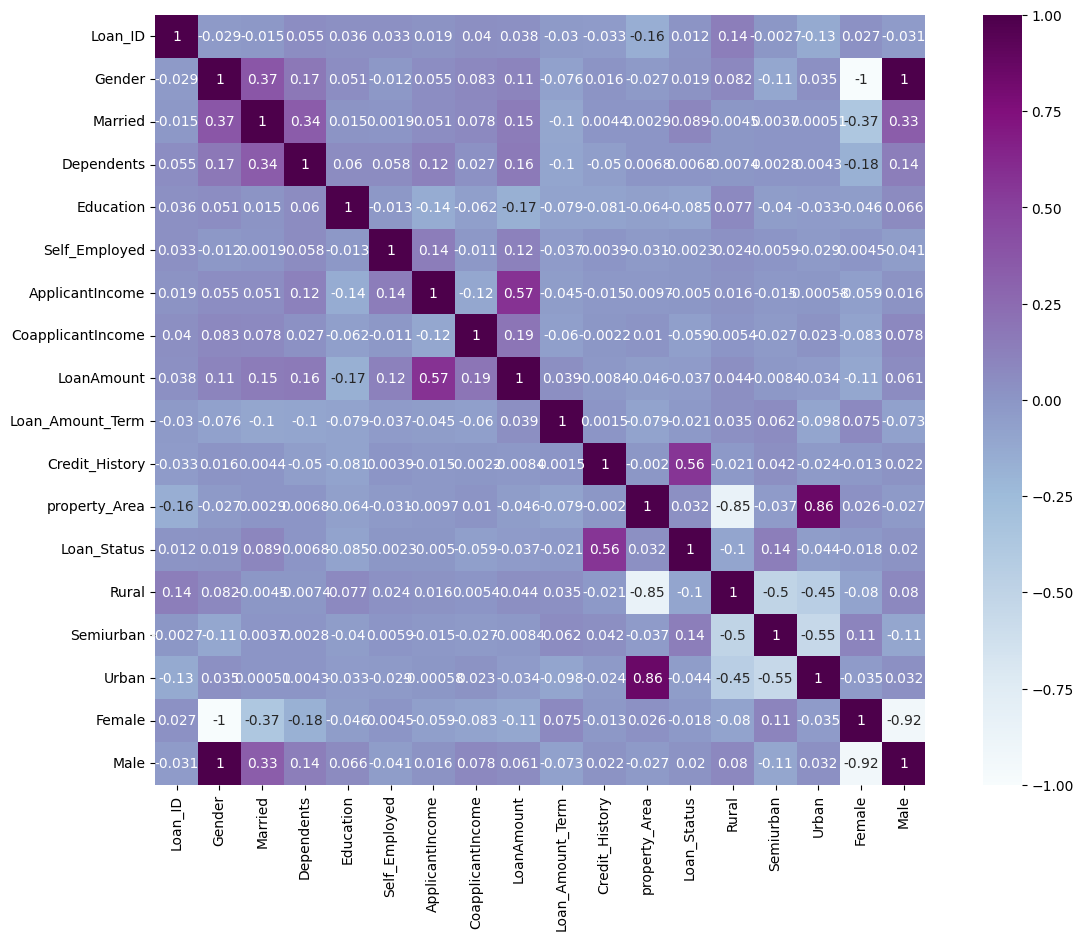

In [429]:
corr = df.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, vmax=1, square=True, cmap="BuPu", annot=True)
corr

In [430]:
target_corr = corr['Loan_Status'].dropna().sort_values(ascending=False)
target_corr

Loan_Status          1.000000
Credit_History       0.561678
Semiurban            0.136540
Married              0.089280
property_Area        0.032112
Male                 0.019833
Gender               0.018804
Loan_ID              0.011958
Dependents           0.006781
Self_Employed       -0.002303
ApplicantIncome     -0.004964
Female              -0.017987
Loan_Amount_Term    -0.021268
LoanAmount          -0.037318
Urban               -0.043621
CoapplicantIncome   -0.059292
Education           -0.085354
Rural               -0.100694
Name: Loan_Status, dtype: float64

In [431]:
df.isnull().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
Rural                 0
Semiurban             0
Urban                 0
Female                0
Male                  0
dtype: int64

In [432]:
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Richa\AppData\Local\Temp\ipykernel_30880\4176552985.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Richa\AppData\Local\Temp\ipykernel_30880\4176552985.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [433]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
Rural                 0
Semiurban             0
Urban                 0
Female                0
Male                  0
dtype: int64

In [434]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\Richa\AppData\Local\Temp\ipykernel_30880\1785451039.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Richa\AppData\Local\Temp\ipykernel_30880\1785451039.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [435]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
property_Area         0
Loan_Status           0
Rural                 0
Semiurban             0
Urban                 0
Female                0
Male                  0
dtype: int64

In [436]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df.isna().sum()

C:\Users\Richa\AppData\Local\Temp\ipykernel_30880\3479195733.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
Loan_Status          0
Rural                0
Semiurban            0
Urban                0
Female               0
Male                 0
dtype: int64

In [437]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Loan_Income_Ratio'] = df['LoanAmount'] / df['Total_Income']
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']
df['Balance_Income'] = df['Total_Income'] - df['EMI']

In [438]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Loan_Status,Rural,Semiurban,Urban,Female,Male,Total_Income,Loan_Income_Ratio,EMI,Balance_Income
0,1002,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,128.0,360.0,...,1,0,0,1,0,1,5849.0,0.021884,0.355556,5848.644444
1,1003,1.0,1.0,1.0,0.0,0.0,3806.0,1508.0,128.0,360.0,...,0,1,0,0,0,1,5314.0,0.024087,0.355556,5313.644444
2,1005,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,...,1,0,0,1,0,1,3000.0,0.022000,0.183333,2999.816667
3,1006,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,...,1,0,0,1,0,1,4941.0,0.024287,0.333333,4940.666667
4,1008,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,...,1,0,0,1,0,1,6000.0,0.023500,0.391667,5999.608333


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Loan_Status,Rural,Semiurban,Urban,Female,Male,Total_Income,Loan_Income_Ratio,EMI,Balance_Income
Loan_ID,1.000000,-0.027152,-0.015693,0.051828,0.037547,0.034032,0.020215,0.040159,0.038845,-0.034219,...,0.011958,0.138927,-0.002689,-0.131603,0.027152,-0.031275,0.037309,0.028267,0.059194,0.037306
Gender,-0.027152,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058561,0.082734,0.106904,-0.074030,...,0.017987,0.080283,-0.108623,0.034530,-1.000000,0.924953,0.092859,-0.103151,0.059760,0.092857
Married,-0.015693,0.364569,1.000000,0.334216,0.012304,0.004489,0.051971,0.075673,0.146546,-0.100912,...,0.091478,-0.006805,0.005845,0.000546,-0.364569,0.328980,0.083429,-0.014784,0.093830,0.083424
Dependents,0.051828,0.172914,0.334216,1.000000,0.055752,0.056798,0.118364,0.029963,0.163103,-0.103864,...,0.010118,-0.000816,0.001924,-0.001198,-0.172914,0.137618,0.125512,0.056152,0.103277,0.125508
Education,0.037547,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140477,-0.062091,-0.168759,-0.073928,...,-0.085884,0.077520,-0.039410,-0.034279,-0.045364,0.065385,-0.160978,0.073610,-0.077175,-0.160977
Self_Employed,0.034032,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127369,-0.015953,0.115100,-0.033739,...,-0.003700,0.022065,0.008710,-0.030338,0.000525,-0.035924,0.113231,-0.073698,0.051766,0.113230
ApplicantIncome,0.020215,0.058561,0.051971,0.118364,-0.140477,0.127369,1.000000,-0.116237,0.565248,-0.046667,...,-0.004608,0.015700,-0.013844,-0.000889,-0.058561,0.015492,0.893078,-0.317999,0.320637,0.893078
CoapplicantIncome,0.040159,0.082734,0.075673,0.029963,-0.062091,-0.015953,-0.116237,1.000000,0.189379,-0.059485,...,-0.059439,0.005570,-0.026750,0.022240,-0.082734,0.078724,0.343044,-0.201871,0.136501,0.343043
LoanAmount,0.038845,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565248,0.189379,1.000000,0.036960,...,-0.033214,0.043467,-0.005804,-0.036050,-0.106904,0.058831,0.620355,0.151812,0.491989,0.620334
Loan_Amount_Term,-0.034219,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046667,-0.059485,0.036960,1.000000,...,-0.022549,0.034321,0.059141,-0.094279,0.074030,-0.072072,-0.071079,0.166901,-0.500119,-0.071042


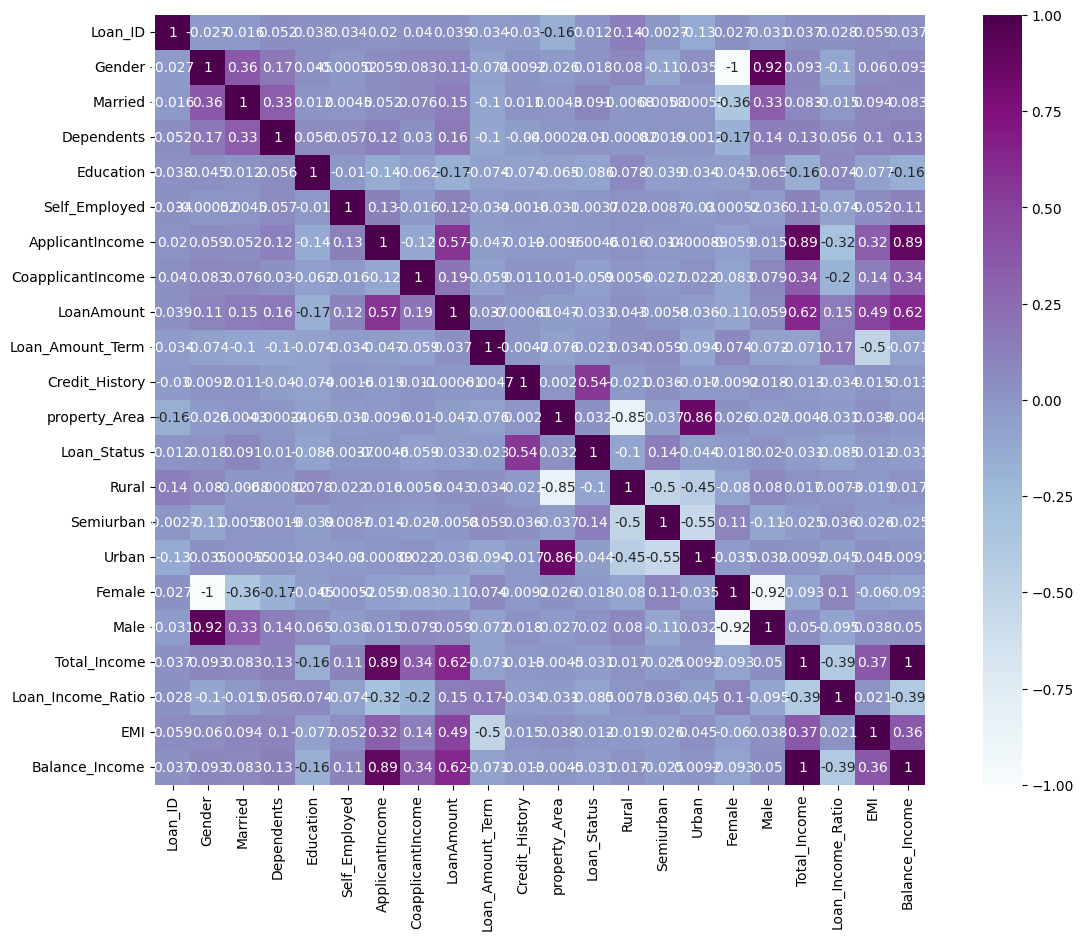

In [439]:
corr2 = df.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr2, vmax=1, square=True, cmap="BuPu", annot=True)
corr2

In [440]:
target_corr2 = corr2['Loan_Status'].dropna().sort_values(ascending=False)
target_corr2

Loan_Status          1.000000
Credit_History       0.540556
Semiurban            0.136540
Married              0.091478
property_Area        0.032112
Male                 0.019833
Gender               0.017987
Loan_ID              0.011958
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004608
EMI                 -0.011757
Female              -0.017987
Loan_Amount_Term    -0.022549
Balance_Income      -0.031282
Total_Income        -0.031282
LoanAmount          -0.033214
Urban               -0.043621
CoapplicantIncome   -0.059439
Loan_Income_Ratio   -0.085359
Education           -0.085884
Rural               -0.100694
Name: Loan_Status, dtype: float64

In [441]:
target_corr2 = target_corr2[abs(target_corr2) > 0.03].sort_values(key=abs, ascending=False)
target_corr2

Loan_Status          1.000000
Credit_History       0.540556
Semiurban            0.136540
Rural               -0.100694
Married              0.091478
Education           -0.085884
Loan_Income_Ratio   -0.085359
CoapplicantIncome   -0.059439
Urban               -0.043621
LoanAmount          -0.033214
property_Area        0.032112
Total_Income        -0.031282
Balance_Income      -0.031282
Name: Loan_Status, dtype: float64